<a href="https://colab.research.google.com/github/PhuocPhat19146046/PhuocPhat19146046/blob/main/faceID.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from keras.utils import np_utils
from keras.models import Sequential,load_model
from keras.layers import Dense , Activation, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.utils import load_img,img_to_array
from keras.backend import categorical_crossentropy
from tensorflow.keras.optimizers import  SGD
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers import Dense, Activation, Dropout, BatchNormalization, LSTM, Flatten
from tensorflow.keras.utils import load_img, img_to_array
import os
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(rescale=1./255,validation_split=0.15)
data_train=datagen.flow_from_directory('drive/MyDrive/Colab Notebooks/faceID',
                                      target_size=(150,150),batch_size=10,
                                      interpolation="lanczos",class_mode='categorical',
                                      shuffle=False,subset="training")
data_vali=datagen.flow_from_directory('drive/MyDrive/Colab Notebooks/faceID',
                                      target_size=(150,150),batch_size=10,
                                      interpolation="lanczos",class_mode='categorical',
                                      shuffle=False,subset="validation")

Found 85 images belonging to 2 classes.
Found 14 images belonging to 2 classes.


In [ ]:
data_train.class_indices

{'Phat': 0, 'other': 1}

In [ ]:
model = Sequential()
model.add(Flatten(input_shape=(150,150,3)))
model.add(Dense(512,activation='relu'))
model.add(Dense(784,activation='relu'))
model.add(Dense(2,activation='Softmax'))
model.summary()
opt=SGD(learning_rate=0.001,momentum=0.9)
model.compile(loss='categorical_crossentropy',optimizer=opt,metrics=['accuracy'])
history=model.fit(data_train,batch_size=(32,32),epochs=20,verbose=1,validation_data=data_vali)

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 67500)             0         
                                                                 
 dense_12 (Dense)            (None, 512)               34560512  
                                                                 
 dense_13 (Dense)            (None, 784)               402192    
                                                                 
 dense_14 (Dense)            (None, 2)                 1570      
                                                                 
Total params: 34,964,274
Trainable params: 34,964,274
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
9/9 [==============================] - 11s 1s/step - loss: 1.7912 - accuracy: 0.5882 - val_loss: 0.5144 - val_accuracy: 0.7143
Epoch 2/20
9/9 [====================

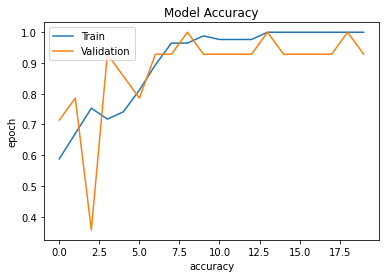

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('accuracy')
plt.ylabel('epoch')
plt.legend(['Train','Validation'],loc='upper left')
plt.show()

In [ ]:
#model.save('drive/MyDrive/Colab Notebooks/model/faceID.h5')

In [ ]:
from tensorflow.keras.models import load_model
model_1=load_model('drive/MyDrive/Colab Notebooks/model/faceID.h5')

Found 39 images belonging to 1 classes.


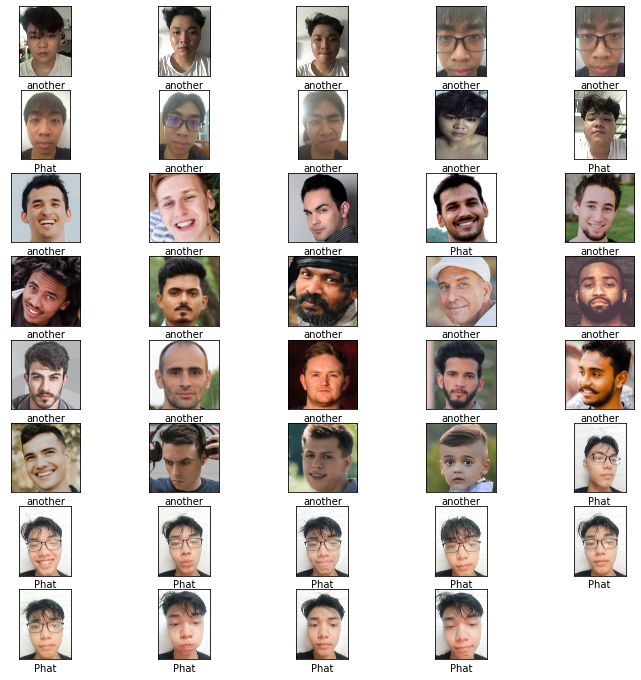

In [ ]:
from tensorflow.keras.utils import load_img, img_to_array
import os
import matplotlib.pyplot as plt
from skimage import io
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(rescale=1./255)
datagenerator=datagen.flow_from_directory('drive/MyDrive/Colab Notebooks/data/test_faceID/',
                                        batch_size=5,interpolation="lanczos",shuffle=False)
face={0:'Phat',
       1:'another'}
plt.figure(figsize=(12,12))
for i in range(len(datagenerator.filenames)):
    plt.subplot(8,5,i+1)
    plt.imshow(io.imread(os.path.join(datagenerator.directory,datagenerator.filenames[i])))
    plt.xticks([])
    plt.yticks([])
    img=load_img('drive/MyDrive/Colab Notebooks/data/test_faceID/'+
                 datagenerator.filenames[i],target_size=(150,150))
    img=img_to_array(img)
    img=img.reshape(1,150,150,3)
    img=img.astype('float')
    img/=255
    plt.xlabel(face[np.argmax(model_1.predict(img))])
plt.show()